In [1]:
import pandas as pd 
from forecast import apply_forecast_macro

In [2]:
city = '3103'

filename = f'../data/dengue_{city}.csv'

df = pd.read_csv(filename, index_col = 'Unnamed: 0')

df.tail()

,casos_3105400,p_rt1_3105400,Rt_3105400,p_inc100k_3105400,casos_3106200,p_rt1_3106200,Rt_3106200,p_inc100k_3106200,casos_3106705,p_rt1_3106705,...,umid_max_small,pressao_min_small,pressao_max_small,precip_tot_small,rainy_days_small,temp_mean_small,temp_amp_small,umid_mean_small,umid_amp_small,pressao_mean_small
2023-12-03,16.0,0.639486,1.132828,51.725185,364.0,0.955803,1.113816,20.899727,70.0,0.977369,...,84.060022,0.998147,1.002784,7.765879,7.000000,25.356562,8.287140,67.215897,33.688249,1.000466
2023-12-10,23.0,0.875028,1.411277,79.109110,319.0,0.954018,1.108199,22.446386,52.0,0.946175,...,84.379470,0.998472,1.003216,4.261484,5.605634,25.974446,9.521270,65.381702,37.995536,1.000844
2023-12-17,7.0,0.109267,0.651765,39.554554,221.0,0.993437,1.156983,24.667230,29.0,0.904123,...,81.944735,0.998433,1.003123,2.710540,5.267606,25.761130,10.203753,61.202459,41.484552,1.000778
2023-12-24,0.0,0.120325,0.663642,39.554554,19.0,0.824713,1.056183,23.755098,11.0,0.974775,...,86.135184,0.996509,1.001197,16.299631,5.802817,24.762021,8.737893,68.826982,34.616402,0.998853
2023-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.564905,0.998355,1.002438,15.395889,7.000000,25.408710,8.113848,74.622433,31.884944,1.000396


In [3]:
pd.read_csv(filename, index_col = 'Unnamed: 0', nrows = 1)

,casos_3105400,p_rt1_3105400,Rt_3105400,p_inc100k_3105400,casos_3106200,p_rt1_3106200,Rt_3106200,p_inc100k_3106200,casos_3106705,p_rt1_3106705,...,umid_max_small,pressao_min_small,pressao_max_small,precip_tot_small,rainy_days_small,temp_mean_small,temp_amp_small,umid_mean_small,umid_amp_small,pressao_mean_small
2010-01-03,1.0,0.0,0.0,3.042658,339.0,0.0,0.0,13.444037,63.0,0.0,...,90.886053,0.998826,1.002795,2.112768,2.929577,24.288872,9.694847,72.057322,37.657463,1.00081


In [4]:
df.columns[df.columns.str.endswith('small')].shape

(16,)

In [5]:
df.columns[df.columns.str.startswith('casos')].shape[0]

32

In [6]:
32*(18) + 2 + 17

595

### Make forecast: 

In [7]:
import geopandas as gpd

df_muni = gpd.read_file('../muni_br.gpkg')

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [8]:
look_back = 52
predict_n = 10
ini_date = None
end_date = '2023-12-24'
model_name = f'trained_{city}_dengue_macro'

Target column: 120
(1, 52, 561)
(1, 52, 561)


2024-01-19 11:29:52.201284: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-01-19 11:29:52.203073: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1780] (One-time warning): Not using XLA:CPU for cluster.

If you want XLA:CPU, do one of the following:

 - set the TF_XLA_FLAGS to include "--tf_xla_cpu_global_jit", or
 - set cpu_global_jit to true on this session's OptimizerOptions, or
 - use experimental_jit_scope, or
 - use tf.function(jit_compile=True).

To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a
proper command-line flag, not via TF_XLA_FLAGS).
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-

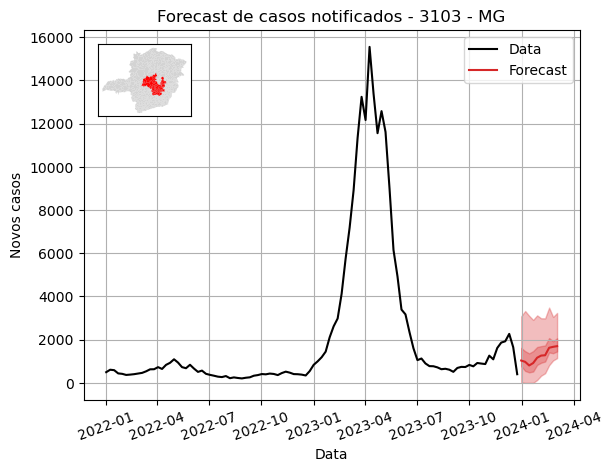

CPU times: user 4.38 s, sys: 283 ms, total: 4.66 s
Wall time: 3.4 s


In [9]:
%%time
df_for = apply_forecast_macro(city, ini_date, end_date, look_back=52, predict_n=10, filename=filename, model_name = model_name, df_muni = df_muni)

In [7]:
import geopandas as gpd

df_muni = gpd.read_file('../muni_br.gpkg')

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


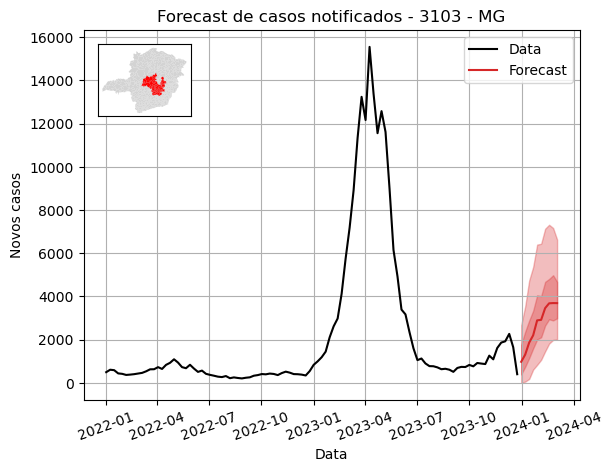

In [8]:
plot_for_macro(int(city), df_for, df_muni, ini_date = '2022-01-01', filename= filename)

In [9]:
df_for

,date,lower_2_5,lower_25,forecast,upper_75,upper_97_5,region
0,2023-12-31,0.000000,521.160210,1012.822252,1616.594269,2607.624686,3103
1,2024-01-07,0.000000,766.244414,1576.438040,2188.884663,3691.008871,3103
2,2024-01-14,0.000000,1002.463156,1994.995108,2697.921998,5132.583120,3103
3,2024-01-21,107.086804,1431.397158,2361.193720,3232.823895,5620.888576,3103
4,2024-01-28,351.788733,1778.623288,2862.015020,3882.539281,6718.620230,3103
5,2024-02-04,570.236038,1891.942250,2881.315516,3852.468221,6530.718646,3103
6,2024-02-11,1053.709597,2525.108604,3394.482027,4333.786160,7206.288384,3103
7,2024-02-18,1467.958494,2811.414762,3578.623346,4557.491870,7327.577069,3103
8,2024-02-25,1608.428813,2821.977725,3741.596789,4655.508156,7010.309943,3103
9,2024-03-03,1762.041878,2904.464939,3694.365543,4500.970837,6796.939871,3103


In [8]:
import matplotlib.pyplot as plt
import geopandas as gpd

df_muni = gpd.read_file('../muni_br.gpkg')
df_muni = df_muni.loc[df_muni.abbrev_state == 'MG']
df_muni.code_muni = df_muni.code_muni.astype(int)
df_muni.head()

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,code_muni,name_muni,code_state,abbrev_state,geometry
2243,3100104,Abadia Dos Dourados,31,MG,"POLYGON ((-47.49976 -18.40731, -47.50359 -18.4..."
2244,3100203,Abaeté,31,MG,"POLYGON ((-45.63706 -19.13274, -45.63390 -19.1..."
2245,3100302,Abre Campo,31,MG,"POLYGON ((-42.55901 -20.28511, -42.55719 -20.2..."
2246,3100401,Acaiaca,31,MG,"POLYGON ((-43.12231 -20.43351, -43.12344 -20.4..."
2247,3100500,Açucena,31,MG,"POLYGON ((-42.62262 -19.06284, -42.61583 -19.0..."


In [9]:
dfs = pd.read_csv('../macro_saude.csv')
    
geocodes = dfs.loc[dfs.code_macro == int(city)].geocode.unique()

In [10]:
geocodes

array([3106705, 3106408, 3108107, 3110004, 3122603, 3124104, 3127206,
       3135704, 3137601, 3142502, 3146404, 3155702, 3157807, 3158003,
       3158508, 3161007, 3161908, 3162955, 3171808, 3103207, 3105004,
       3105400, 3106002, 3106200, 3107703, 3109600, 3109907, 3112505,
       3113800, 3115359, 3117876, 3118601, 3120607, 3126000, 3129806,
       3130101, 3132800, 3160504, 3134608, 3136207, 3136603, 3136652,
       3140159, 3140704, 3142304, 3143500, 3143609, 3143708, 3144706,
       3147402, 3147501, 3149606, 3150406, 3153608, 3153905, 3154606,
       3155306, 3156007, 3159001, 3162922, 3164803, 3165537, 3171204,
       3100203, 3104809, 3107000, 3109006, 3109204, 3115607, 3131703,
       3118908, 3119104, 3120904, 3123106, 3125705, 3125903, 3126406,
       3128006, 3131000, 3131109, 3131901, 3139706, 3140001, 3140605,
       3141108, 3144805, 3146107, 3146909, 3149309, 3157203, 3152006,
       3153202, 3153707, 3154804, 3156700, 3156809, 3160603, 3167202,
       3166105, 3168

In [11]:
df_for.head()

,date,lower_2_5,lower_25,forecast,upper_75,upper_97_5
0,2023-12-31,0.000000,732.146932,1019.528413,1715.112524,3472.964896
1,2024-01-07,0.000000,1078.307643,1556.878149,2220.115717,3553.625832
2,2024-01-14,334.387162,1461.726907,1974.014781,2718.248082,5148.987213
3,2024-01-21,644.223279,1923.114899,2400.511448,3285.899888,5708.882651
4,2024-01-28,1137.706079,2343.264881,3032.790030,3952.961718,6544.220627


/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


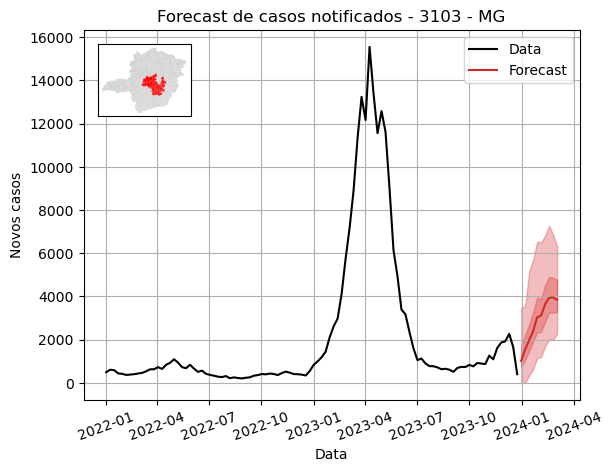

In [13]:
def plot_for_macro():
    df_data = pd.read_csv(filename, index_col = 'Unnamed: 0')

    df_data.index = pd.to_datetime(df_data.index)

    fig, ax = plt.subplots()

    ax.plot(df_data['2022-01-01':][f'casos_{city}'], label = 'Data', color = 'black')


    ax.plot(df_for.date, df_for.forecast , color = 'tab:red', label = 'Forecast')

    ax.fill_between(df_for.date, df_for.lower_2_5, 
                        df_for.upper_97_5, color = 'tab:red', alpha = 0.3)

    ax.fill_between(df_for.date, df_for.lower_25, 
                        df_for.upper_75, color = 'tab:red', alpha = 0.3)

    ax.legend()

    ax.grid()

    ax.set_title(f'Forecast de casos notificados - {city} - MG')

    for tick in ax.get_xticklabels():
                tick.set_rotation(20)

    ax.set_ylabel('Novos casos')

    ax.set_xlabel('Data')

    l, b, h, w = .07, .7, .15, .3
    ax2 = fig.add_axes([l, b, w, h])

    df_muni.plot(ax = ax2, color = 'lightgray')

    df_muni.loc[df_muni.code_muni.isin(geocodes)].plot(ax = ax2, color = 'red')


    #ax2.set_axis_off()
    ax2.set_xticks([])
    ax2.set_yticks([])

    plt.show()